# T028 · Kinase similarity: Compare different perspectives

Authors:

- Talia B. Kimber, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Dominique Sydow, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)
- Andrea Volkamer, 2021, [Volkamer lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

We will compare different perspectives on kinase similarity, which were discussed in detail in previous notebooks:

* **Talktorial T024**: Kinase pocket sequences (KLIFS pocket sequences)
* **Talktorial T025**: Kinase pocket structures (KiSSim fingerprint based on KLIFS pocket residues)
* **Talktorial T026**: Kinase-ligand interaction profiles (KLIFS IFPs based on KLIFS pocket residues)
* **Talktorial T027**: Ligand profiling data

### Contents in *Theory*

* Kinase dataset
* Kinase similarity descriptor (considering 4 different aspects)

### Contents in *Practical*

* Load kinase matrices
* Visualize similarity for example perspective
  * Visualize kinase matrix
  * Visualize similarity as dendrograms
* Visualize similarities from different perspectives
  * Preprocess distance matrices
    * Normalize different matrices
    * Define kinase order
  * Visualize kinase similarities
  * Analyze of results

### References

* Kinase dataset: [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629) 
* Clustering and dendrograms with `scipy`: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

## Theory

### Kinase dataset

We use the kinase selection as defined in __Talktorial T023__.

### Kinase similarity descriptor (considering 4 different aspects)

- __Talktorial T024__ = KLIFS pocket sequence
- __Talktorial T025__ = KiSSim fingerprint
- __Talktorial T026__ = KLIFS interaction fingerprint
- __Talktorial T027__ = Ligand profile: ChEMBL29, bioactivity

## Practical

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance_matrix, distance
from scipy.cluster import hierarchy

In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Load kinase matrices

We define the paths to the kinase distance matrices.

In [3]:
kinase_distance_matrix_paths = {
    "sequence": "T024_kinase_similarity_sequence",
    "kissim": "T025_kinase_similarity_kissim",
    "ifp": "T026_kinase_similarity_ifp",
    "ligand-profile": "T027_kinase_similarity_ligand_profile"
}
kinase_distance_matrix_paths = {
    perspective: HERE / f"../{folder_name}/data/kinase_distance_matrix.csv" 
    for perspective, folder_name in kinase_distance_matrix_paths.items()
}

We load the distance matrices.

In [4]:
kinase_distance_matrices = {}
for kinsim_perspective, path in kinase_distance_matrix_paths.items():
    kinase_distance_matrices[kinsim_perspective] = pd.read_csv(path, index_col=0).round(6)

We check if the matrices have the same dimensions

In [5]:
for descriptor, similarity_df in kinase_distance_matrices.items():
    print(f"Shape of {descriptor} matrix: {similarity_df.shape}")

Shape of sequence matrix: (9, 9)
Shape of kissim matrix: (9, 9)
Shape of ifp matrix: (9, 9)
Shape of ligand-profile matrix: (9, 9)


We check the distances.

### Visualize similarity for example perspective

In [6]:
print(f"Choices of precalculated descriptors: {kinase_distance_matrix_paths.keys()}")

Choices of precalculated descriptors: dict_keys(['sequence', 'kissim', 'ifp', 'ligand-profile'])


We look at an example matrix:

In [7]:
descriptor_selection = "sequence"

In [8]:
kinase_distance_matrix = kinase_distance_matrices[descriptor_selection]
kinase_distance_matrix

,EGFR,ErbB2,p110a,KDR,BRAF,CDK2,LCK,MET,p38a
EGFR,0.000000,0.059037,0.572938,0.283953,0.344972,0.351553,0.288679,0.288742,0.355356
ErbB2,0.059037,0.000000,0.586362,0.297882,0.345400,0.369692,0.314925,0.302033,0.364827
p110a,0.572938,0.586362,0.000000,0.577295,0.563541,0.576006,0.548664,0.606301,0.568806
KDR,0.283953,0.297882,0.577295,0.000000,0.328732,0.346621,0.312352,0.286194,0.346556
BRAF,0.344972,0.345400,0.563541,0.328732,0.000000,0.353245,0.327067,0.361842,0.362088
CDK2,0.351553,0.369692,0.576006,0.346621,0.353245,0.000000,0.318747,0.343975,0.276907
LCK,0.288679,0.314925,0.548664,0.312352,0.327067,0.318747,0.000000,0.309121,0.337419
MET,0.288742,0.302033,0.606301,0.286194,0.361842,0.343975,0.309121,0.000000,0.370645
p38a,0.355356,0.364827,0.568806,0.346556,0.362088,0.276907,0.337419,0.370645,0.000000


#### Visualize kinase matrix

We visualize the kinase matrix in the form of a heatmap.

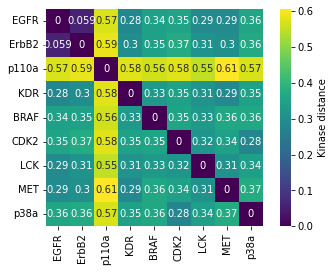

In [9]:
sns.heatmap(
    kinase_distance_matrix, 
    linewidths=0, 
    annot=True, 
    square=True, cbar_kws={'label': 'Kinase distance'}, 
    cmap='viridis', 
);

#### Visualize similarity as dendrogram

We use the `scipy` function `squareform` to create a condensed vector of the distance matrix of shape $n*(n-1)/2$, where $n$ is the shape of the quadratic distance matrix. The values in this vector correspond to the values of the lower triangular matrix.

In [10]:
D = kinase_distance_matrix.values
D_condensed = distance.squareform(D)
D_condensed

array([0.059037, 0.572938, 0.283953, 0.344972, 0.351553, 0.288679,
       0.288742, 0.355356, 0.586362, 0.297882, 0.3454  , 0.369692,
       0.314925, 0.302033, 0.364827, 0.577295, 0.563541, 0.576006,
       0.548664, 0.606301, 0.568806, 0.328732, 0.346621, 0.312352,
       0.286194, 0.346556, 0.353245, 0.327067, 0.361842, 0.362088,
       0.318747, 0.343975, 0.276907, 0.309121, 0.337419, 0.370645])

We can submit this condensed vector to a hierarchical clustering to extract the relationship between the different kinases. We use here `method="average"`, which stands for the linkage method UPGMA (unweighted pair group method with arithmetic mean). This means that the distance between two clusters A and B is defined as the average of all distances between pairs of elements in clusters A and B. At each clustering step, the two clusters with the lowest average distance are combined.

In [11]:
hclust = hierarchy.linkage(D_condensed, method="average")

We now generate a phylogenetic tree based on our clustering.

In [12]:
tree = hierarchy.to_tree(hclust)

We visualize this tree as dendrogram.

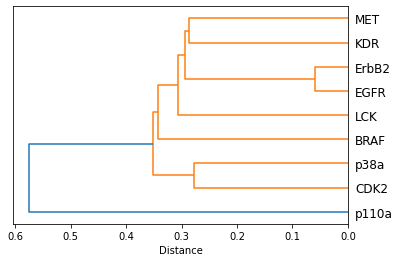

In [13]:
fig, ax = plt.subplots()
labels = kinase_distance_matrix.columns.to_list()
hierarchy.dendrogram(hclust, labels=labels, orientation="left", ax=ax)
ax.set_xlabel("Distance");

### Visualize similarities from different perspectives

#### Preprocess distance matrices

##### Normalize different matrices 

We normalize the different matrices to values in $[0, 1]$.

In [14]:
def _min_max_normalize(distance_matrix_df):
    """
    Apply min-max normalization to input DataFrame.
    
    Parameters
    ----------
    kinase_distance_matrix_df : pd.DataFrame
        Kinase distance matrix.

    Returns
    -------
    pd.DataFrame
        Normalized kinase distance matrix.
    """
    min_ = distance_matrix_df.min().min()
    max_ = distance_matrix_df.max().max()
    distance_matrix_normalized_df = (distance_matrix_df - min_) / (max_ - min_)
    return distance_matrix_normalized_df

In [15]:
kinase_distance_matrices_normalized = {}
for descriptor, similarity_df in kinase_distance_matrices.items():
    similarity_normalized_df = _min_max_normalize(similarity_df)
    kinase_distance_matrices_normalized[descriptor] = similarity_normalized_df

##### Define kinase order

Define in which order to display the kinases.

In [16]:
kinase_names = kinase_distance_matrices_normalized["sequence"].columns

In [17]:
def _define_kinase_order(kinase_distance_matrix_df, kinase_names):
    """
    Define the order in which kinases shall
    appear in the input DataFrame.
    
    Parameters
    ----------
    kinase_distance_matrix_df : pd.DataFrame
        Kinase distance matrix.
    kinase_name : list of str
        List of kinase names to be used for sorting.

    Returns
    -------
    pd.DataFrame
        Kinase distance matrix with sorted columns/rows.
    """
    kinase_distance_matrix_df = kinase_distance_matrix_df \
        .reindex(kinase_names, axis=1) \
        .reindex(kinase_names, axis=0)
    return kinase_distance_matrix_df

In [18]:
kinase_distance_matrices_normalized = {
    descriptor: _define_kinase_order(similarity_df, kinase_names) 
    for descriptor, similarity_df in kinase_distance_matrices_normalized.items()
}

#### Visualize kinase similarities

In [19]:
def heatmap(distance_matrix, ax=None, title=""):
    """
    Generate heatmap from distance matrix.
    
    Parameters
    ----------
    distance_matrix : pd.DataFrame
        Distance matrix.
    ax : matplotlib.axes
        Plot axis to use!
    title : str
        Plot title.
    """
    sns.heatmap(
        distance_matrix, 
        linewidths=0, 
        annot=True, 
        square=True, 
        cmap='viridis', 
        ax=ax
    )

In [20]:
def dendrogram(distance_matrix, ax=None, title=""):
    """
    Generate dendrogram from distance matrix.
    
    Parameters
    ----------
    distance_matrix : pd.DataFrame
        Distance matrix.
    ax : matplotlib.axes
        Plot axis to use!
    title : str
        Plot title.
    """
    D = distance_matrix.values
    D_condensed = distance.squareform(D)
    hclust = hierarchy.linkage(D_condensed, method="average")
    tree = hierarchy.to_tree(hclust)
    labels = distance_matrix.columns.to_list()
    hierarchy.dendrogram(hclust, labels=labels, orientation="left", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Distance")

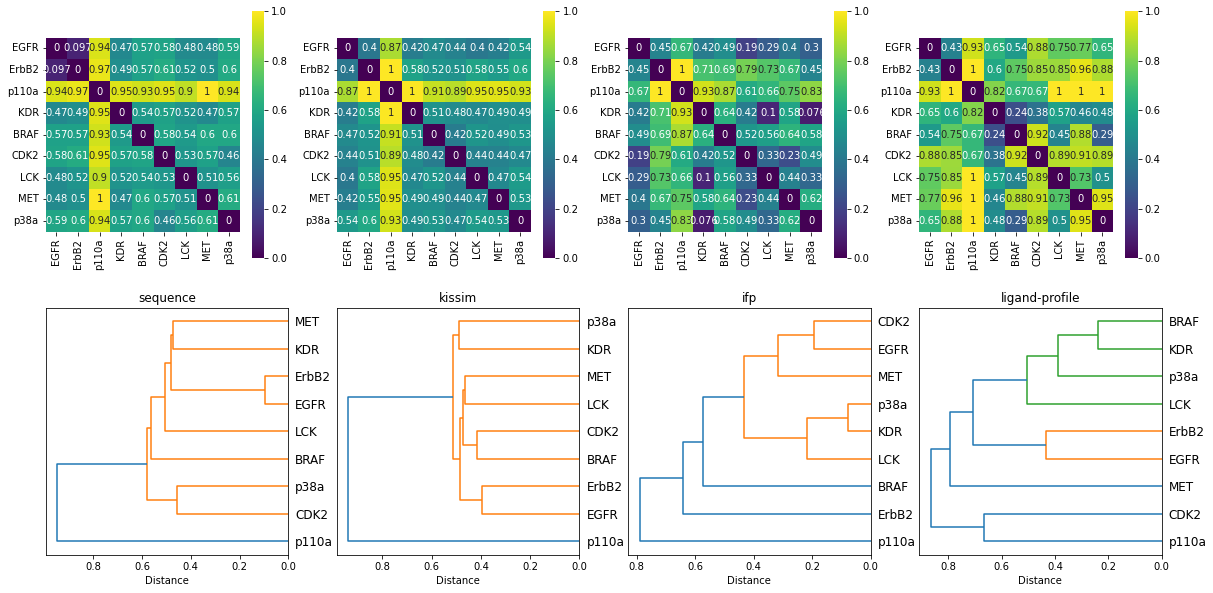

In [21]:
n_perspectives = len(kinase_distance_matrices_normalized)
fig, axes = plt.subplots(2, n_perspectives, figsize=(n_perspectives*5, 10))
for i, (perspective, matrix) in enumerate(kinase_distance_matrices_normalized.items()):
    heatmap(matrix, ax=axes[0][i], title=perspective)
    dendrogram(matrix, ax=axes[1][i], title=perspective)

We load here again the input kinase information that we defined in __Talktorial T023__.

In [22]:
kinase_selection_df = pd.read_csv(HERE / "../T023_what_is_a_kinase/data/kinase_selection.csv")
kinase_selection_df

,kinase,kinase_klifs,uniprot_id,group,full_kinase_name
0,EGFR,EGFR,P00533,TK,Epidermal growth factor receptor
1,ErbB2,ErbB2,P04626,TK,Erythroblastic leukemia viral oncogene homolog 2
2,PI3K,p110a,P42336,Atypical,Phosphatidylinositol-3-kinase
3,VEGFR2,KDR,P35968,TK,Vascular endothelial growth factor receptor 2
4,BRAF,BRAF,P15056,TKL,Rapidly accelerated fibrosarcoma isoform B
5,CDK2,CDK2,P24941,CMGC,Cyclic-dependent kinase 2
6,LCK,LCK,P06239,TK,Lymphocyte-specific protein tyrosine kinase
7,MET,MET,P08581,TK,Mesenchymal-epithelial transition factor
8,p38a,p38a,Q16539,CMGC,p38 mitogen activated protein kinase alpha


#### Analyze of results

- The _sequence_ approach reproduces nicely the Manning _et al._ tree
  - The TK kinases EGFR, ErbB2, MET, KDR are grouped together with highest similarities for EGFR and ErbB2
  - The TKL kinase LCK groups next to the TK kinases
  - The CMGC kinases p38a and CDK2 are grouped together
  - The atypical kinase p110a is a singleton
- When taking into account the pocket structure (physicochemical and spatial properties) with the _kissim_ approach, similar observations can be made, the typical kinases are grouped together, while the atypical kinase p110a is a singleton. Within the typical kinase grouping, EGFR and ErbB2 are the most similar.
- The _ifp_ view:
  - BRAF and the atypical kinase p110a form a singletons each
  - Surprisingly, ErbB2 forms a singleton (=not grouped with EGFR), but we have to keep in mind that we have the least data points ($4$) for ErbB2.
- The _ligand-profile_ view:
  - CDK2 and p110a create their own cluster early on (i.e. low similarity to the rest)
  - BRAF, p38a, KDR, LCK (TKL, CMGC and TK group) as well as EGFR and ErbB2 (TK) form one cluster
  - Surprisingly, MET (TK) forms a singleton 
- Overall observations:
  - Members of the same family (here: EGFR and ErbB2) are grouped together closely in the _sequence_ _kissim_, and _ligand-profile_ approaches.
  - The atypical kinase p110a show high dissimilarity in the _sequence_, _kissim_, and _ifp_ approaches
  - Unexpectedly, KDR (TK) and p38a (CMGC) cluster together in all views (minus _sequence_)

<!---
- Comparison to multi-target profiles in [<i>Molecules</i> (2021), <b>26(3)</b>, 629](https://www.mdpi.com/1420-3049/26/3/629)
  - Profile 1: 
    - EGFR/ErbB2 as on-targets and BRAF as anti-target
    - Should be doable from "sequence", "ligand-profile" view (less clear from "kisim" and "ifp" view)
  - Profile 2:
    - EGFR/p110a as on-targets and BRAF as anti-target
    - Should be hard to design from all views
  - Profile 3: 
    - EGFR/KDR as on-targets and BRAF as anti-target
    - Should be hard to design except from a "sequence" view
--->

## Discussion

We have assessed kinase similarity from many different angles: the pocket sequence, the pocket structure, ligand binding modes (interaction fingerprints), and ligand bioactivities. We see from our results, that different conclusions can be drawn for each perspective, while some observations agree.
Thus, it is beneficial to consider different metrics to study kinase similarity.

The different approaches have strengths and drawbacks:

- The _sequence_ view: Sequence data is available for all kinases, however no information about structure or ligand binding is included.
- The _kissim_, _ifp_, and _ligand-profile_ views: Information about structure, ligand binding, or ligand bioactivity is included, however some kinases may not have any data, some kinases may have only few data, and most kinases may not be fully explored (even if a lot of data is available).
- All views rely on simplifications! 
  - Dealing with multiple measurements
    - _ligand-profile_ view: Only one measurement per kinase-ligand is used here.
    - _kissim_ and _ifp_ view: Only one structure/IFP pair represents one kinase pair here.
  - Bioactivity cutoffs to define active/inactive compounds in case of the _ligand-profile_ view

## Quiz

1. Can you think of another perspective to assess kinase similarity?
2. Are there another method to assess and visualize the similarities?
3. Can you name at least one advantage and one disadvantage per perspective discussed here?